In [18]:
from densely_captioned_images.dataset.dense_image import DenseCaptionedImage
import numpy as np
import matplotlib.pyplot as plt

def plot_image(processed_image, clip_preprocesed=True):
    if clip_preprocesed:
        image_np = processed_image.numpy()
    else:
        image_np = processed_image

    # CLIP processor normalizes and resizes images, so we need to denormalize
    mean = np.array([0.48145466, 0.4578275, 0.40821073]).reshape(-1, 1, 1)
    std = np.array([0.26862954, 0.26130258, 0.27577711]).reshape(-1, 1, 1)

    if clip_preprocesed:
        # Denormalize
        image_np = std * image_np + mean
        # Convert from channels first to channels last
        # Clip values to [0, 1] range
        image_np = np.clip(image_np, 0, 1)
        image_np = np.transpose(image_np, (1, 2, 0))

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()
    
# Load an image by its ID
dci = DenseCaptionedImage(img_id=987)  # Replace with actual image ID

# Get the image as a numpy array
image = dci.get_image()

# Get the full formatted description
full_description = dci.get_formatted_complete_description()[0]['caption']

# Alternatively, get base caption and extended caption
base_caption = dci.get_base_caption()[0]['caption']  # Short caption
extended_caption = dci.get_extended_caption()[0]['caption']  # More detailed

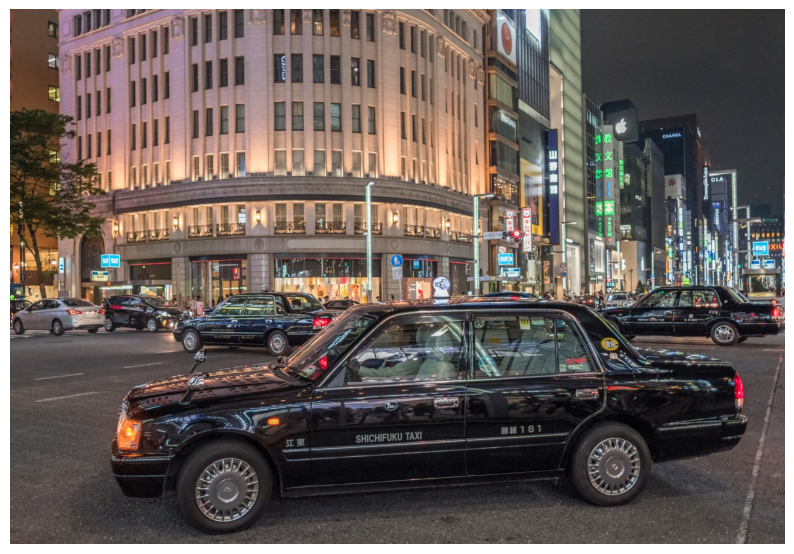

In [19]:
plot_image(image, clip_preprocesed=False)

In [10]:
from build_index import KGramIndex

# Example usage
kgram_index = KGramIndex(k=2)

# Add sample documents
documents = {
    0: "The quick brown fox jumps over the lazy dog",
    1: "A fast fox swiftly jumps over a sleepy dog",
    2: "The fox is clever and jumps high",
}

for doc_id, text in documents.items():
    kgram_index.add_document(doc_id, text)

# Query search
print(kgram_index.compute_tf_idf_query("fox jump"))  # Ranked document IDs with scores


[(1, 8.693147180559945), (0, 8.0), (2, 8.0)]


In [27]:
from build_index import KGramIndex

captions_index = KGramIndex.load(filename=f"K={3}_index.pkl", k=3)

captions_index.compute_tf_idf_query('taxi')

Index loaded from data/K=3_index.pkl


[(1279, 84.08905857909626),
 (439, 82.00502491373457),
 (924, 77.35846149377024),
 (139, 68.5732709253544),
 (2850, 65.33520296195724),
 (5601, 64.72633654175645),
 (6867, 62.78536259538066),
 (352, 61.693820668832295),
 (2265, 61.410831633369874),
 (91, 60.083774714158686)]

In [28]:
from densely_captioned_images.dataset.impl import get_complete_dataset_with_settings
COMPLETE_DATASET_SIZE = 7599
SPLIT = "train"

def load_dataset(start_index=0, end_index=COMPLETE_DATASET_SIZE):
    print(f"Loading dataset from {start_index} to {end_index}")
    return get_complete_dataset_with_settings(
        split=SPLIT, start_index=start_index, end_index=end_index
    )

data = load_dataset(1279, 1280)

Loading dataset from 1279 to 1280


Loading Dense Caps:: 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]


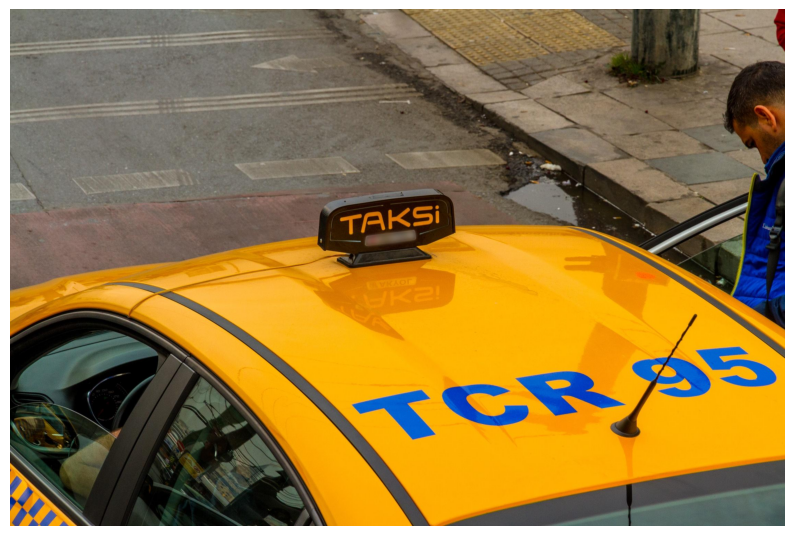

In [29]:
plot_image(data[0][0]['image'], clip_preprocesed=False)

In [26]:
print(data[0][0]['caption'])

Two cars are parked on the side of a street in front of two buildings, one building has a metal cover on the ceiling. 
There are two buildings in the image, one on the left and one on the right, the one on left has grey tiles on top and it is open under the top, the open area is dark and in shadow, this area is behind the second car.  The building on the right is made of grey brick on the bottom and the top of wall looks like vents, over the vents are thick grey supports on the ceiling, at the ends of the screen cover over the cars.  The second building looks to have a screen cover/top that extends left.  The left and right buildings meet in the middle of image at the top, the right edge of top tile of building on left meet with the first left vent/screen on the top of the second building.  No sky is visible, but it is daytime.  The sidewalk is visible from the top of front end of first car to right edge, and a small part of sidewalk is visible behind the back of the second car.  There